## 01. Import libraries

In [38]:
# import libraries

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis
from cdlib import algorithms

## 02. Import Data

In [7]:
# import country - relationship data:

countries_df = pd.read_csv("/Users/piperdutcher/Documents/Data-Visualizations/20th_Century/Data/20th_century_relationships.csv", index_col = 0)

## 03. Prepare DF for Visualization

In [11]:
# first, examining countries_df

countries_df

,source_country,target_country
0,France,Russia
1,France,Russia
2,Russia,Germany
3,Germany,Bulgaria
4,Bulgaria,Russia
...,...,...
600,Romania,Russia
601,Romania,Russia
602,Lebanon,India
603,Lebanon,India


In [13]:
# in order to graph the network, we need to sort the relationships and add values
# Sort the cases first, then assign value later
# setting axis = 1 indicates that we want the sorting to occur across the columns within each row (not between rows themselves)

relationships_df = pd.DataFrame(np.sort(countries_df.values, axis = 1), columns = countries_df.columns)
relationships_df.head(5)

,source_country,target_country
0,France,Russia
1,France,Russia
2,Germany,Russia
3,Bulgaria,Germany
4,Bulgaria,Russia


In [15]:
# next, we should assign values to each relationship, and create a new column in our dataframe:

relationships_df['value'] = 1

# creating the new value column, setting the value to 1, serves as a count for each row.
# as we move through the da\f then group by the source_country/target_country columns, the value will increase

relationships_values = relationships_df.groupby(['source_country','target_country'], sort = False, as_index = False).sum()

relationships_values.head(10)

,source_country,target_country,value
0,France,Russia,12
1,Germany,Russia,26
2,Bulgaria,Germany,6
3,Bulgaria,Russia,6
4,Germany,Italy,26
5,Austria,Germany,11
6,Germany,Spain,1
7,France,Poland,11
8,France,Germany,31
9,Germany,Poland,28


In [17]:
# want to sort this by descending:

relationships_values = relationships_values.sort_values(by="value", ascending = False)
relationships_values.head(10)

,source_country,target_country,value
8,France,Germany,31
9,Germany,Poland,28
1,Germany,Russia,26
4,Germany,Italy,26
30,Germany,Japan,24
42,India,Pakistan,18
28,Egypt,Libya,16
31,Japan,Russia,16
13,Finland,Lithuania,12
11,Estonia,Latvia,12


In [95]:
# now that we have assigned values (count) to all occurences of relationships between countries, we can begin our network vis
# lets export this new DF in case we need it later:

relationships_values.to_csv('20th_century_relationships_values.csv')

## 04. Create a Network Graph

In [20]:
# start by creating the network object from our relationships_values dataframe:
# the nodes are going to be our countries (source,target)
# the edges will be the value column


countries_network = nx.from_pandas_edgelist(relationships_values, 
                            source = "source_country", 
                            target = "target_country", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

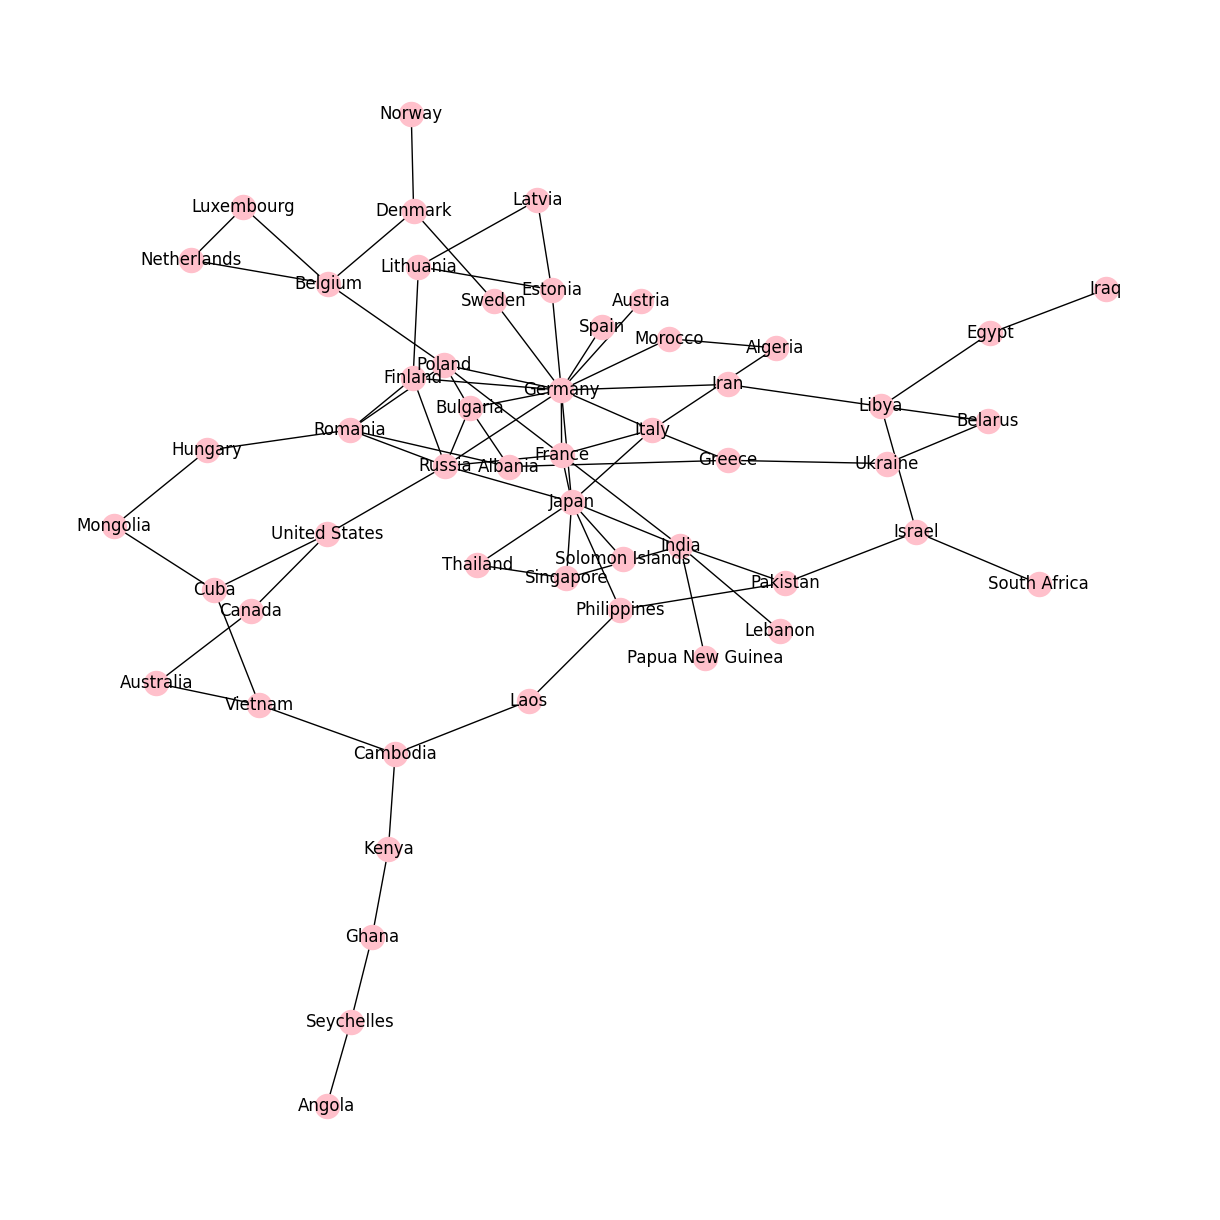

In [22]:
# now that we have the network object created, let's make a graph! 
# kamada-kawai algorithm used here places closely-related nodes.. closer together.

countries_graph = plt.figure(figsize = (12,12))
pos = nx.kamada_kawai_layout(countries_network)
nx.draw(countries_network, with_labels = True, node_color = 'pink', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [141]:
# this looks good! the pink nodes are legible, but we can make something more interactive!

countries_graph.savefig('networkx_countries_graph.png')

## 05. Create an Interactive Map using PyVis

In [25]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#fbf6f1', font_color='black')

# Define nodes from the Gcountries_network object
node_degree = dict(countries_network.degree)

# Setting up node size attributes
nx.set_node_attributes(countries_network, node_degree, 'size')
net.from_nx(countries_network)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries_Pyvis.html")


countries_Pyvis.html


In [246]:
# lets save this:

net.save_graph("countries_Pyvis.html")

## 06. Leiden Algorithm and Communities

In [28]:
# we've already imported the Leiden Algorithm, but what is it?
# this algorithm is used to detect communities (densely connected nodes/entities)
# the Leiden algorithm optimizes the grouping

In [34]:
# start with a new community:

communities = algorithms.leiden(countries_network)
new_community = communities.to_node_community_map()
new_community

defaultdict(list,
            {'France': [0],
             'Germany': [0],
             'Poland': [0],
             'Russia': [0],
             'Italy': [0],
             'Finland': [0],
             'Albania': [0],
             'Greece': [0],
             'Austria': [0],
             'Bulgaria': [0],
             'Romania': [0],
             'Algeria': [0],
             'Morocco': [0],
             'Spain': [0],
             'Japan': [1],
             'India': [1],
             'Pakistan': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'Singapore': [1],
             'Thailand': [1],
             'Papua New Guinea': [1],
             'Lebanon': [1],
             'Egypt': [2],
             'Libya': [2],
             'Israel': [2],
             'South Africa': [2],
             'Iran': [2],
             'Belarus': [2],
             'Ukraine': [2],
             'Iraq': [2],
             'Cuba': [3],
             'United States': [3],
             '

In [36]:
# save this as a new dictionary:
# using a dictionary comprehension (k is the key, and the value will be the # in the [] )

community_dict = {k:v[0] for k, v in new_community.items()}
community_dict

{'France': 0,
 'Germany': 0,
 'Poland': 0,
 'Russia': 0,
 'Italy': 0,
 'Finland': 0,
 'Albania': 0,
 'Greece': 0,
 'Austria': 0,
 'Bulgaria': 0,
 'Romania': 0,
 'Algeria': 0,
 'Morocco': 0,
 'Spain': 0,
 'Japan': 1,
 'India': 1,
 'Pakistan': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'Singapore': 1,
 'Thailand': 1,
 'Papua New Guinea': 1,
 'Lebanon': 1,
 'Egypt': 2,
 'Libya': 2,
 'Israel': 2,
 'South Africa': 2,
 'Iran': 2,
 'Belarus': 2,
 'Ukraine': 2,
 'Iraq': 2,
 'Cuba': 3,
 'United States': 3,
 'Hungary': 3,
 'Mongolia': 3,
 'Australia': 3,
 'Canada': 3,
 'Vietnam': 3,
 'Ghana': 4,
 'Seychelles': 4,
 'Cambodia': 4,
 'Laos': 4,
 'Kenya': 4,
 'Angola': 4,
 'Denmark': 5,
 'Norway': 5,
 'Belgium': 5,
 'Sweden': 5,
 'Luxembourg': 5,
 'Netherlands': 5,
 'Lithuania': 6,
 'Estonia': 6,
 'Latvia': 6}

In [40]:
# create a new network graph utilizing the new community_dict

nx.set_node_attributes(countries_network, community_dict, 'group')
community_network = Network(notebook = True, width="1000px", height="700px", bgcolor='#ffffff', font_color='black')
community_network.from_nx(countries_network)
community_network.show_buttons(filter_ = True)
community_network.repulsion()
community_network.show("country_communities_leiden.html")

country_communities_leiden.html


In [42]:
net.save_graph("country_communities_leiden.html")

Initial observations based on my knowledge of 20th century hisory indicates that this grouping looks relatively accurate. I think I would have expected to see the United States connected more directly to other countries (primarily Germany, France, Poland, Japan) due to involvement with WWII. Otherwise, the graph seems to support/ represent the various conflicts that occurred.

## 07. Degree, Closeness, Betweeness, Centrality

In [201]:
# Degree Centrality:

degree_dict = nx.degree_centrality(countries_network)
degree_dict

{'France': 0.11538461538461539,
 'Germany': 0.25,
 'Poland': 0.09615384615384616,
 'Russia': 0.13461538461538464,
 'Italy': 0.09615384615384616,
 'Japan': 0.17307692307692307,
 'India': 0.11538461538461539,
 'Pakistan': 0.057692307692307696,
 'Egypt': 0.038461538461538464,
 'Libya': 0.07692307692307693,
 'Finland': 0.07692307692307693,
 'Lithuania': 0.057692307692307696,
 'Estonia': 0.057692307692307696,
 'Latvia': 0.038461538461538464,
 'Denmark': 0.057692307692307696,
 'Norway': 0.019230769230769232,
 'Albania': 0.057692307692307696,
 'Greece': 0.057692307692307696,
 'Israel': 0.057692307692307696,
 'South Africa': 0.019230769230769232,
 'Austria': 0.019230769230769232,
 'Philippines': 0.057692307692307696,
 'Solomon Islands': 0.019230769230769232,
 'Cuba': 0.057692307692307696,
 'United States': 0.057692307692307696,
 'Australia': 0.038461538461538464,
 'Canada': 0.038461538461538464,
 'Bulgaria': 0.07692307692307693,
 'Sweden': 0.038461538461538464,
 'Romania': 0.09615384615384616,

Text(0.5, 1.0, '20th Century Countries - Degree Centrality')

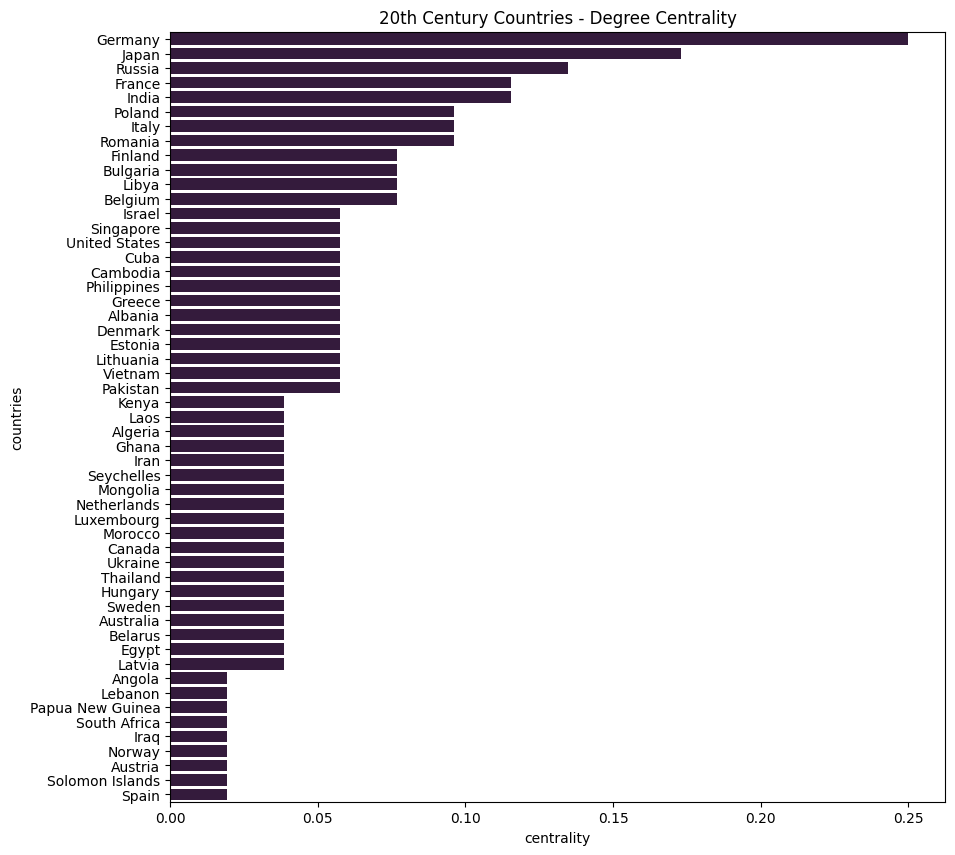

In [226]:
# this isn't very informative at a glance, lets create a bar chart
# first is to transform this into a dataframe, then sort descending

degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

# now we can plot this:

plt.figure(figsize = (10, 10))
sns.set_palette("rocket")
sns.barplot(x = "centrality", y = "countries",
saturation = 0.9, data = degree_df).set_title("20th Century Countries - Degree Centrality")

Based on the above chart, we can easily gather that Germany, Japan, and Russia have the highest degrees of centrality (or the most connections to other countries). Based upon the events of the 20th Century and the multiple world wars, this chart appears to be accurate/representative.

In [230]:
# Closeness Centrality:

# following the above process:

closeness_dict = nx.closeness_centrality(countries_network)
closeness_dict

{'France': 0.35135135135135137,
 'Germany': 0.3851851851851852,
 'Poland': 0.3151515151515151,
 'Russia': 0.3466666666666667,
 'Italy': 0.32098765432098764,
 'Japan': 0.36619718309859156,
 'India': 0.30057803468208094,
 'Pakistan': 0.2694300518134715,
 'Egypt': 0.21052631578947367,
 'Libya': 0.26262626262626265,
 'Finland': 0.3058823529411765,
 'Lithuania': 0.23963133640552994,
 'Estonia': 0.2857142857142857,
 'Latvia': 0.22807017543859648,
 'Denmark': 0.23853211009174313,
 'Norway': 0.19330855018587362,
 'Albania': 0.2549019607843137,
 'Greece': 0.26666666666666666,
 'Israel': 0.24074074074074073,
 'South Africa': 0.1947565543071161,
 'Austria': 0.27956989247311825,
 'Philippines': 0.30952380952380953,
 'Solomon Islands': 0.2694300518134715,
 'Cuba': 0.24413145539906103,
 'United States': 0.287292817679558,
 'Australia': 0.20553359683794467,
 'Canada': 0.23318385650224216,
 'Bulgaria': 0.3076923076923077,
 'Sweden': 0.2905027932960894,
 'Romania': 0.2937853107344633,
 'Belgium': 0.251

Text(0.5, 1.0, '20th Century Countries - Closeness Centrality')

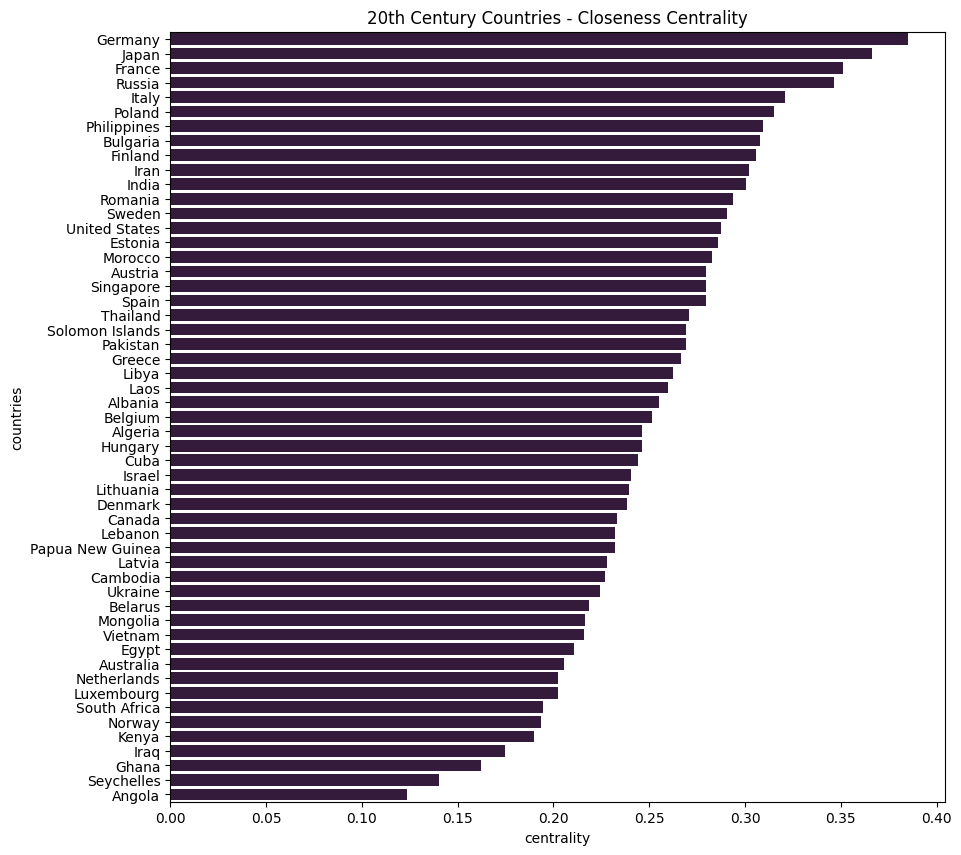

In [236]:
# again, transforming this into something more easily interpreted
# first is to transform this into a dataframe, then sort descending

closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

# now we can plot this:

plt.figure(figsize = (10, 10))
sns.set_palette("rocket")
sns.barplot(x = "centrality", y = "countries",
saturation = 0.9, data = closeness_df).set_title("20th Century Countries - Closeness Centrality")

We can see that all countries have a higher degree of closeness, as all were relatively important. It is unsurprising to observe that Germany, Japan, And Russia are amongst the top and more closely connected.

In [240]:
# Betweenness Centrality

# again, same workflow:

betweenness_dict = nx.betweenness_centrality(countries_network)
betweenness_dict

{'France': 0.08766698987287222,
 'Germany': 0.42084141348847226,
 'Poland': 0.12780740501328738,
 'Russia': 0.19457552251669896,
 'Italy': 0.08087157940099116,
 'Japan': 0.28751346692523144,
 'India': 0.11113714716655895,
 'Pakistan': 0.07956438985850749,
 'Egypt': 0.038461538461538464,
 'Libya': 0.13781871723048197,
 'Finland': 0.03888888888888892,
 'Lithuania': 0.006561085972850679,
 'Estonia': 0.043552036199095,
 'Latvia': 0.0,
 'Denmark': 0.04072398190045249,
 'Norway': 0.0,
 'Albania': 0.017946922358687063,
 'Greece': 0.0453889248006895,
 'Israel': 0.07604323780794368,
 'South Africa': 0.0,
 'Austria': 0.0,
 'Philippines': 0.18883412339294695,
 'Solomon Islands': 0.0,
 'Cuba': 0.05780004309416074,
 'United States': 0.12262533218415568,
 'Australia': 0.005279034690799397,
 'Canada': 0.02790346907993967,
 'Bulgaria': 0.025235222294045824,
 'Sweden': 0.060457516339869295,
 'Romania': 0.07607914960856135,
 'Belgium': 0.08584715937657114,
 'Hungary': 0.02786396609926022,
 'Singapore': 

Text(0.5, 1.0, '20th Century Countries - Betweenness Centrality')

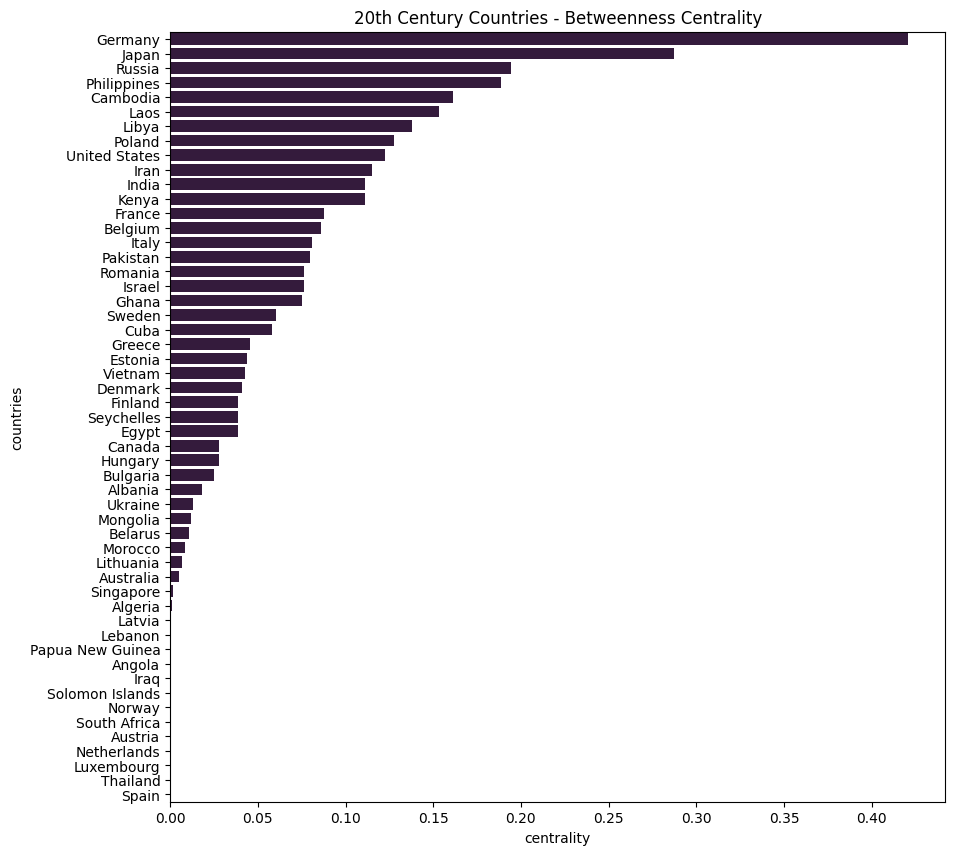

In [242]:
# again, transforming this into something more easily interpreted
# first is to transform this into a dataframe, then sort descending

betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])
betweenness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

# now we can plot this:

plt.figure(figsize = (10, 10))
sns.set_palette("rocket")
sns.barplot(x = "centrality", y = "countries",
saturation = 0.9, data = betweenness_df).set_title("20th Century Countries - Betweenness Centrality")

We can observe that Germany and Japan were some of the more influential countries in the 20th Century based on the above betweenness centrality measure. This indicates that the countries towards the upper end serve as bridges towards other countries.